# Notion de programme en tant que donnée, calculabilité, décidabilité

---
## Un programme en tant que donnée ?

Nous sommes habitués à utiliser des **programmes** Python qui sont souvent faits de **fonctions**. Ces fonctions manipulent des **variables** qui sont les **données** de nos programmes.  
Tous ces termes distinguent des éléments de l'informatique qui sont bien différents par nature. Pourtant, les programmes ne peuvent-ils pas être considérés comme des données ?  

### Un exemple simple
Voici ci-dessous une fonction simple `hello` qui prend en paramètre une chaine de caractères `name` et affiche le texte `Hello` suivi de la chaine de caractères saisie en paramètre :

In [ ]:
def hello(name):
    print('Hello',name)

In [ ]:
hello("terminale NSI")

Dans ce programme, `hello` est une **fonction** et `name` est une **donnée**, deux notions qui ne semblent pas de nature comparable.  
Pourtant, notre fonction `hello` n'est rien d'autre qu'une succession de caractères. On peut d'ailleurs l'écrire dans une chaîne de caractères de la manière suivante :

In [ ]:
# Note : \n est le caractère qui représente le retour chariot et \t la tabulation
fct_hello = "def hello(name):\n\tprint('Hello',name)"

In [ ]:
print(fct_hello)

Etudions le programme suivant : il permet de décomposer une chaine de caractères en fonction, puis de l'exécuter avec des paramètres :

In [ ]:
def universel(algo, *args):
    # Exécute la définition de la fonction
    exec(algo)
    # Récupère la première ligne de la chaine de caractère : "def hello(name):"
    ligne1 = algo.split('\n')[0]
    # Récupère le nom de la fonction : "hello"
    nom = ligne1.split('(')[0][4:]
    # Exécute la fonction et lui passe les paramètres
    return eval(f"{nom}{args}")

On peut donc appeler ce nouveau programme en lui passant en arguments :
- La variable contenant notre fonction
- La donnée sur laquelle celle-ci va travailler  

et obtenir le résultat.

In [ ]:
universel(fct_hello, 'Term NSI')

Ci-dessus nous avons donc bien utilisé notre programme `fct_hello` et nos données `'Term NSI'` en tant qu'objets de même nature : des **données**.

> 📌 **Un programme est donc une lui même une donnée qui peut être utilisée et modifiée par d'autres programmes**



### D'autres exemples

- Un **système d'exploitation** peut être vu comme un programme qui a pour données d'autres programmes qu'il fait "tourner".
- L'appel de la **commande** `python monprogramme.py` lance le programme `python` qui prend en donnée le programme `monprogramme.py` enregistré dans un fichier.
- Pour télécharger un logiciel on utilise un **gestionnaire de téléchargement** qui est lui-même un logiciel.
- Les **compilateurs** utilisent comme données le code source de programmes pour le transformer en langage machine ou en fichier .exe.






---
## Calculabilité, décidabilité


### Le problème du barbier

> `Dans une ville où les gens soit se rasent eux-mêmes soit se font raser par le barbier, qui rase le barbier ?`


Pour répondre à cette question, on peut raisonner ainsi :
- soit le barbier se rase lui-même => il n'est pas rasé par le barbier
- soit le barbier ne se rase pas lui même => il est donc rasé par le barbier

Nous obtenons donc dans chaque cas possible une **contradiction**.

Ceci nous permet de conclure que l'hypothèse de départ est fausse (c'est le [raisonnement par l'absurde](https://fr.wikipedia.org/wiki/Raisonnement_par_l%27absurde) en maths). Une ville avec de tels habitants ne peut exister et de ce fait, un algorithme qui permet de calculer la solution à ce problème n'existe pas non plus.

Ce paradoxe bien connu nous permet d'énoncer les affirmations suivantes :

- Tout problème n'as pas forcément de solution.
- Pour tout problème, il n'est pas possible d'écrire un programme qui permette de calculer une solution.
- On ne peut pas tout programmer.


### Décidabilité
> 📌 Un problème est dit **décidable** s'il existe un algorithme qui se termine en un nombre fini d'étapes qui réponde par **oui ou par non** à la question posée par le problème.
S'il n'existe pas de tel algorithme, le problème est dit **indécidable**.

*Exemples:*
- Un problème décidable : **"Pour $x \in \mathbb{N}$, $x$ est-il pair ?"** est décidable car il existe un algorithme qui se termine en un temps fini qui décide si oui ou non $x$ est pair.
- Un problème indécidable : **"Le barbier se rase-t-il ?"** du paradoxe précédent.


### Calculabilité

> 📌 Une fonction $f$ est une fonction **calculable** s'il existe une méthode qui permet d'obtenir l'image $f(x)$ d'un argument $x$ en un nombre fini d'étapes.


*Exemples:*
- Une fonction calculable : Soit $a,b \in \mathbb{N}$, la fonction **"Quel est le PGCD de $a$ et $b$ ?"** est calculable. Il existe un algorithme qui se termine en un temps fini qui calcule le pgcd de $a$ et $b$ : **l'algorithme d'Euclide** 
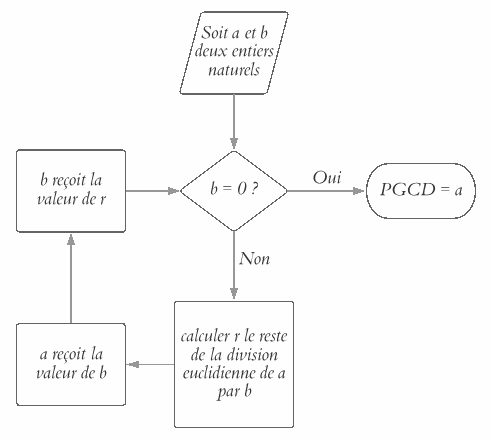
- Une fonction non calculable : **"Qui rase le barbier ?"** du paradoxe du précédent.


---
## Le problème de l'arrêt


### Un exemple

Soit la fonction suivante :


In [ ]:
def compte(n):
    while n != 10 :
        print(n)
        n = n + 1

In [ ]:
compte(5)

Nous avons testé la fonction avec $n=5$, mais que se passe-t-il si on la lance avec $n=11$ ?

`compte` traduit le cauchemar de tout programmeur. Dans certains cas, une fonction tombe dans une **boucle infinie** et ne s'arrête jamais. Dans ce cas, le logiciel est incapable de fournir la réponse attendue par l'utilisateur.



### Preuve du problème de l'arrêt

Puisque nous pouvons utiliser les programmes comme données, supposons qu'il existe une fonction Python `arret(prog,x)` qui retourne `True`  Si l'execution de `prog(x)` s'arrête et `False` si `prog(x)` tombe dans une boucle infinie.  
On pourrait alors utiliser ce genre d'instructions avec notre exemple :

``` python
>>> arret(compte, 1)
True
>>> arret(compte, 2)
True
...
>>> arret(compte, 10)
True
>>> arret(compte, 11)
False

```

Il est alors possible de construire une nouvelle fonction `paradoxe` de la manière suivante :

``` python
def paradoxe(x):
    if arret(paradoxe,x):
        while True :
            pass
    else:
        return True

```

Prenons un nombre `n` au hasard et exécutons `paradoxe(n)` :
- Si `paradoxe(n)` se termine, alors `arret(paradoxe,x)` renvoie `True` et avec le `if`, la fonction tombe dans une boucle infinie.
- Si `paradoxe(n)` ne se termine pas, alors `arret(paradoxe,x)` renvoie `False` et avec le `else`, la fonction s'arrête.

**Dans ces deux cas nous tombons dans une contradiction !**

L'hypothèse de départ qu'un tel programme `arret` existe est donc erronée, il n'existe donc pas de programme qui réponde à la question _"Est-ce que tel programme avec telle donnée s'arrêtera-t-il ?"_ par oui ou par non  le problème de l'arrêt est donc indécidable.

> 📌 Alan Turing a montré en 1936 que le **problème de l'arrêt est indécidable**, c'est-à-dire qu'**il n'existe pas de programme** informatique qui prend comme entrée un programme informatique et un paramètre et qui répond VRAI si le programme s'arrête sur son paramètre et FAUX sinon. 

La vidéo suivante résume cette preuve : [Proof That Computers Can't Do Everything](https://youtu.be/92WHN-pAFCs)

---
## Historique et machine de Turing

- En 1930,  **[Alonzo Church](https://fr.wikipedia.org/wiki/Alonzo_Church)** identifie une classe de fonctions mathématiques que l'on peut décomposer et qui sont donc calculables.

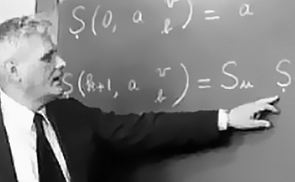
<center><i>Alonzo Church (1903-1995)</i></center>


- En 1936, **[Alan Turing](https://fr.wikipedia.org/wiki/Alan_Turing)** présente la machine qui porte son nom. Il montre que l'ensemble des  fonctions calculables de Church sont identiques à l'ensemble des fonctions programmables sur sa machine.  

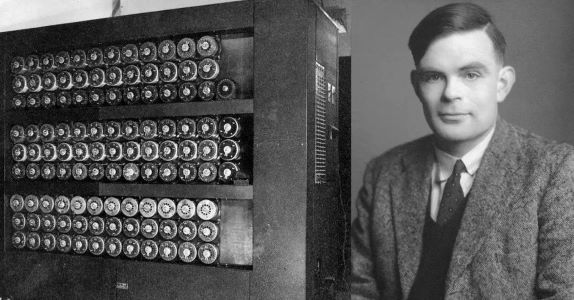
<center><i>Alan Turing (1912-1954)</i></center>

La thèse de Church-Turing affirme que tout traitement réalisable mécaniquement peut être accompli par une machine de Turing : tout programme d'ordinateur, peu importe le langage dans lequel il est écrit, peut donc être traduit en une machine de Turing.
Cette thèse formalise la notion de calculabilité : **Si on peut réaliser un programme sur la machine de Turing alors il est calculable.**



!!! success Calculabilité : résumé

**Ce qu’il faut savoir**
- En 1937 Alonzo Church et Alan Turing ont démontré que certains problèmes ne pouvaient pas être résolus avec un algorithme
- S’il n’existe pas d’algorithme capable de résoudre un problème et que la réponse attendue à ce problème est "oui" ou "non", on dira que ce problème est **indécidable**. Quand ce genre de problème peut être résolu à l’aide d’un algorithme, on dit que ce problème est **décidable**
- S’il n’existe pas d’algorithme capable de résoudre un problème et que la réponse attendue à ce problème est une valeur (issue d’un calcul), on dira que ce problème est **non-calculable**. Quand ce genre de problème peut être résolu à l’aide d’un algorithme, on dit que ce problème est **calculable**
- Si un problème est indécidable (ou un algo non-calculable) cela ne veut pas dire que l’on n’est pas capable de résoudre ce problème, cela veut juste dire qu’il n’existe pas d’algorithme capable de résoudre ce problème.
- **Le problème dit de l’arrêt est indécidable**  

**Ce qu’il faut savoir faire**
- Être capable de montrer que **le problème de l’arrêt est indécidable**
!!!